**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
from scipy import optimize
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass
import numpy as np

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

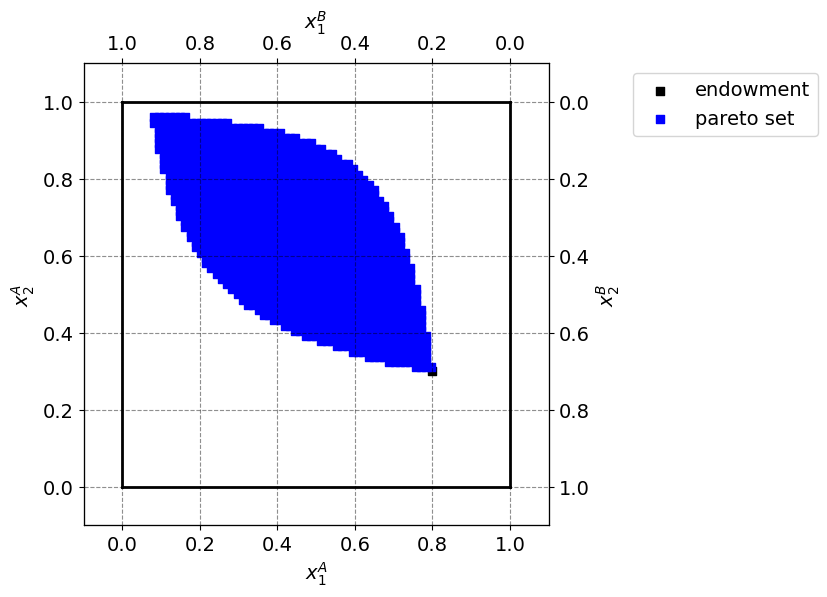

In [4]:
par = model.par
x1a_vec, x2a_vec = model.solve_discrete()

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Add pareto-optiaml point of person A

ax_A.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

### 2.2. <a id='toc2_2_'></a>[Q2](#toc0_)

In [5]:
p1 = 0.5 + (2*np.arange(76)/75)

eps1_vec = []
eps2_vec = []

dicteps = {}

for p in p1:

    eps1, eps2 = model.check_market_clearing(p)

    eps1_vec.append(eps1)
    eps2_vec.append(eps2)

    dicteps[p] = (eps1, eps2)


print(dicteps)


{0.5: (0.533333333333333, -0.2666666666666666), 0.5266666666666666: (0.47594936708860747, -0.25066666666666654), 0.5533333333333333: (0.42409638554216855, -0.23466666666666652), 0.58: (0.3770114942528735, -0.2186666666666665), 0.6066666666666667: (0.33406593406593377, -0.2026666666666665), 0.6333333333333333: (0.2947368421052629, -0.18666666666666654), 0.66: (0.2585858585858586, -0.1706666666666664), 0.6866666666666666: (0.22524271844660193, -0.1546666666666665), 0.7133333333333334: (0.19439252336448576, -0.1386666666666665), 0.74: (0.16576576576576557, -0.12266666666666659), 0.7666666666666666: (0.13913043478260856, -0.10666666666666658), 0.7933333333333333: (0.11428571428571421, -0.09066666666666645), 0.8200000000000001: (0.09105691056910548, -0.07466666666666644), 0.8466666666666667: (0.06929133858267705, -0.05866666666666642), 0.8733333333333333: (0.048854961832061006, -0.04266666666666663), 0.9: (0.029629629629629395, -0.026666666666666616), 0.9266666666666667: (0.0115107913669064

### 2.3. <a id='toc2_3_'></a>[Q3](#toc0_)

In [6]:
min_sum = float('inf')
min_p = None

for p, (eps1, eps2) in dicteps.items():
    abs_sum = abs(eps1) + abs(eps2)

    if abs_sum < min_sum:
        min_sum = abs_sum
        min_p = p


In [7]:
print(f'Market-clearing price is {min_p:.3f} and has the error sum {min_sum:.3f}')

Market-clearing price is 0.953 and has the error sum 0.011


### 2.4a. <a id='toc2_4a_'></a>[Q4a](#toc0_)

In [8]:
dict_ua = {}

max_ua = float(0)
p_ua = None

for p in p1:

    x1b, x2b = model.demand_B(p)

    u_a = model.utility_A(1-x1b, 1-x2b)

    dict_ua[p] = (u_a)

    if u_a > max_ua:
        max_ua = u_a
        p_ua = p


/Users/barbaramus/Desktop/IntroProgNum/projects-2024-anna-vithusha-og-barbara/inauguralproject/ExchangeEconomy.py:21: RuntimeWarning: invalid value encountered in scalar power
  return x1A**par.alpha*x2A**(1-par.alpha)


In [9]:
print(f'The optimal price for person A is {p_ua:.3f} and has utility {max_ua:.3f}')

The optimal price for person A is 1.887 and has utility 0.634


In [10]:
x1B_pua, x2B_pua = model.demand_B(p_ua)

x1A_pua = 1-x1B_pua
x2A_pua = 1-x2B_pua

print(f'The optimal allocation is (x1A,x2A) = ({x1A_pua:.3f}, {x2A_pua:.3f}) and (x1B,x2B) = ({x1B_pua:.3f}, {x2B_pua:.3f})')

The optimal allocation is (x1A,x2A) = (0.619, 0.641) and (x1B,x2B) = (0.381, 0.359)


### 2.4b. <a id='toc2_4b_'></a>[Q4b](#toc0_)

In [11]:
def obj(price):

    x1A = 1 - model.demand_B(price)[0]
    x2A = 1 - model.demand_B(price)[1]
    util_A = model.utility_A(x1A, x2A)
    return - util_A

x0 = [p_ua]

results = optimize.minimize(obj,x0,method='Nelder-Mead', bounds = [(0, None)])

print(results)

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: -0.633620850660405
             x: [ 1.899e+00]
           nit: 11
          nfev: 22
 final_simplex: (array([[ 1.899e+00],
                       [ 1.899e+00]]), array([-6.336e-01, -6.336e-01]))


### 2.5a. <a id='toc2_5a_'></a>[Q5a](#toc0_)

In [12]:
dict_demand = {}

max_ua = float(0)
x1a_u = None
x2a_u = None

for x1a, x2a in zip(x1a_vec, x2a_vec):

    util_a = model.utility_A(x1a, x2a)

    dict_demand[x1a, x2a] = (util_a)

    if util_a > max_ua:
        max_ua = util_a             
        x1a_u= x1a
        x2a_u=x2a

print(f'The allocation for A is (x1A, x2A) = ({x1a_u:.3f}, {x2a_u:.3f}) and (x1B, x2B) = ({1-x1a_u:.3f}, {1-x2a_u:.3f})')

The allocation for A is (x1A, x2A) = (0.581, 0.838) and (x1B, x2B) = (0.419, 0.162)


### 2.5b. <a id='toc2_5b_'></a>[Q5b](#toc0_)

In [13]:
def obj_A(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate utility and return its negative for minimization
    return -model.utility_A(x1A, x2A)

def constraint(x):
    # Unpack x into x1A and x2A
    x1A, x2A = x
    # Calculate Agent B's allocation
    x1B, x2B = 1 - x1A, 1 - x2A
    # Return the difference indicating the constraint
    return model.utility_B(x1B, x2B) - model.utility_B(1-par.w1A, 1-par.w2A)

# Define constraints as a list of dictionaries
constraints = [{'type': 'ineq', 'fun': constraint}]

# Define bounds for x1A and x2A
bounds = ((0, 1), (0, 1))

# Example initial guesses for x1A and x2A
initial_guess = [x1a_u, x2a_u]

# Call the solver
result_A = optimize.minimize(obj_A, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

print(result_A)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.743227608040848
       x: [ 5.757e-01  8.444e-01]
     nit: 4
     jac: [-4.303e-01 -5.868e-01]
    nfev: 12
    njev: 4


In [14]:
print(model.utility_B(1-result_A.x[0], 1 - result_A.x[1]))
print(model.utility_B(1-par.w1A, 1 - par.w2A))

0.3036588967492704
0.30365889718756617


### 2.6a. <a id='toc2_6a_'></a>[Q6a](#toc0_)

In [15]:
def obj_planner(x):

    x1A, x2A = x
        # Calculate utility (joint)
    return - (model.utility_A(x1A, x2A) + model.utility_B(1-x1A, 1-x2A))

# Define bounds for x1A and x2A
bounds = ((0, 1), (0, 1))

# Example initial guesses for x1A and x2A
initial_guess = [result_A.x[0], result_A.x[1]]

# Call the solver
result_planner = optimize.minimize(obj_planner, initial_guess, method='SLSQP', bounds=bounds)

print(result_planner)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0582673679238113
       x: [ 3.333e-01  6.667e-01]
     nit: 7
     jac: [-1.226e-03  1.408e-03]
    nfev: 22
    njev: 7


### 2.6b. <a id='toc2_6b_'></a>[Q6b](#toc0_)

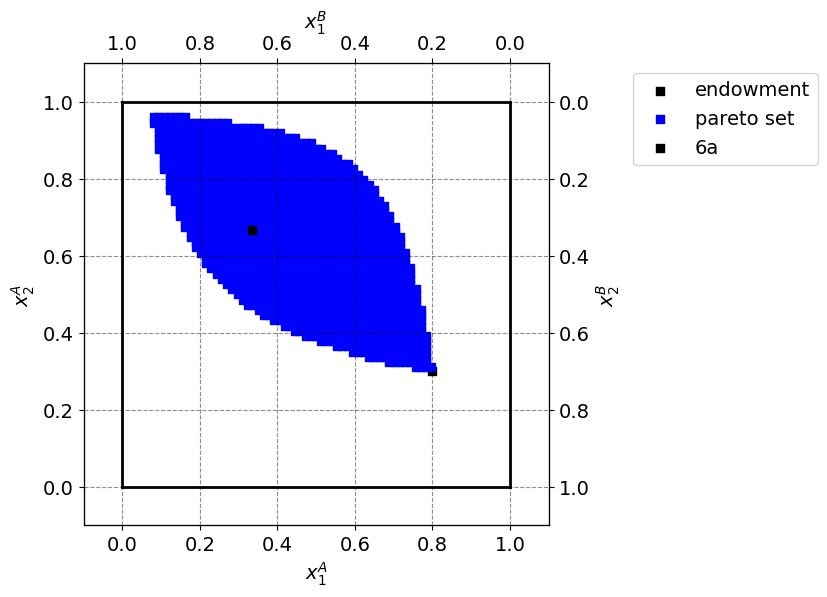

In [17]:
# b. figure set up
fig_1 = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A_1 = fig_1.add_subplot(1, 1, 1)

ax_A_1.set_xlabel("$x_1^A$")
ax_A_1.set_ylabel("$x_2^A$")

temp_1 = ax_A_1.twinx()
temp_1.set_ylabel("$x_2^B$")
ax_B_1 = temp_1.twiny()
ax_B_1.set_xlabel("$x_1^B$")
ax_B_1.invert_xaxis()
ax_B_1.invert_yaxis()

# A
ax_A_1.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# Add pareto-optiaml point of person A

ax_A_1.scatter(x1a_vec,x2a_vec,marker='s', color='blue', label='pareto set')

# illustrate allocation in 6a

ax_A_1.scatter(result_planner.x[0], result_planner.x[1], marker='s', color='black', label='6a')

# limits
ax_A_1.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A_1.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A_1.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A_1.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A_1.set_xlim([-0.1, w1bar + 0.1])
ax_A_1.set_ylim([-0.1, w2bar + 0.1])    
ax_B_1.set_xlim([w1bar + 0.1, -0.1])
ax_B_1.set_ylim([w2bar + 0.1, -0.1])

ax_A_1.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));